In [1]:
import pandas as pd
import matplotlib.pyplot as plt


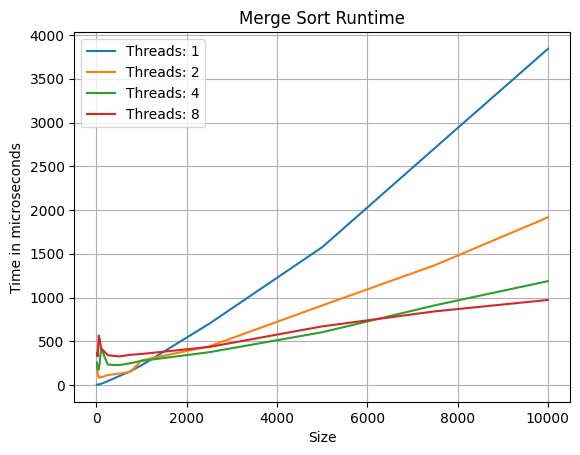

In [22]:
df = pd.read_csv('./run-time.csv', delimiter=';')

df.columns = ['size', 'threads', 'time']

for thread in df['threads'].unique():
    df_thread = df[df['threads'] == thread]
    plt.plot(df_thread['size'], df_thread['time'], label=f'Threads: {thread}')

plt.xlabel('Size')
plt.ylabel('Time in microseconds')
plt.title('Merge Sort Runtime')
plt.grid(True)
plt.legend()
plt.show()





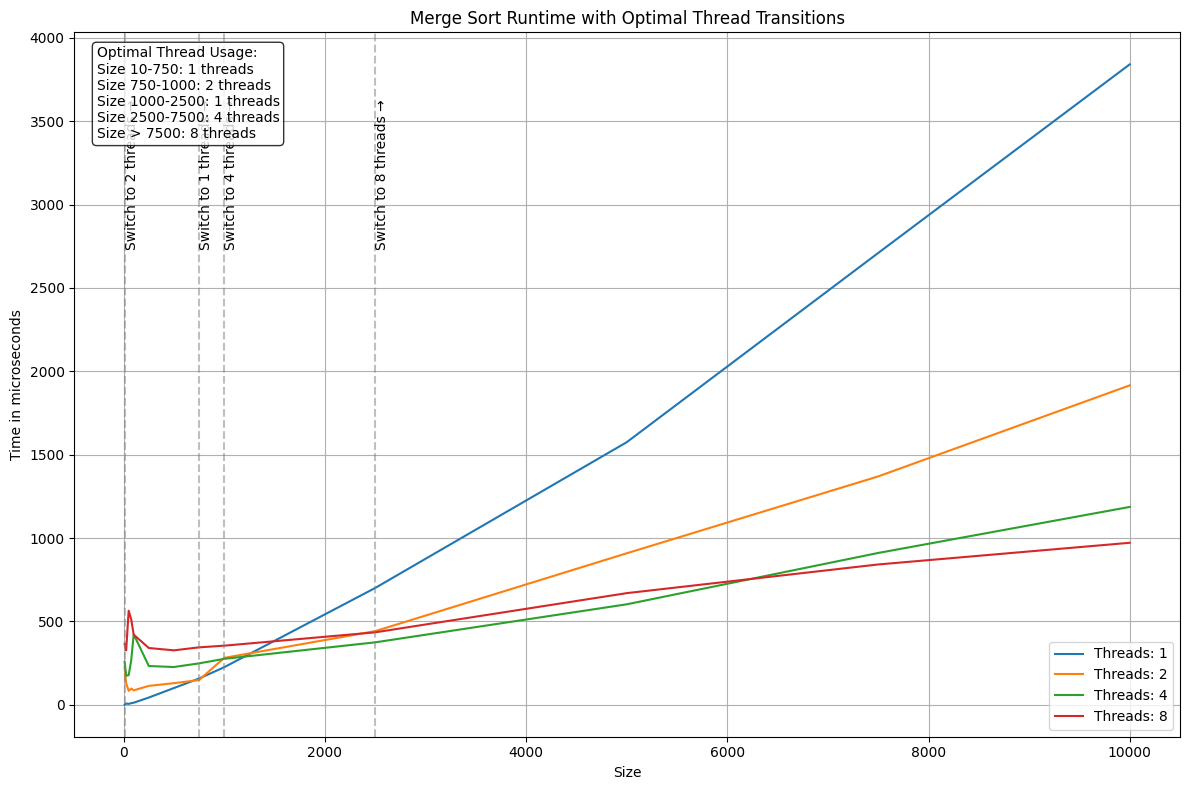

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read and prepare data
df = pd.read_csv('./run-time.csv', delimiter=';')
df.columns = ['size', 'threads', 'time']

plt.figure(figsize=(12, 8))

# Plot lines for each thread count
for thread in sorted(df['threads'].unique()):
    df_thread = df[df['threads'] == thread]
    plt.plot(df_thread['size'], df_thread['time'], label=f'Threads: {thread}')

# For each unique size, find which thread count has minimum time
sizes = sorted(df['size'].unique())
optimal_threads = []
prev_best_thread = None

for size in sizes:
    size_data = df[df['size'] == size]
    best_thread = size_data.loc[size_data['time'].idxmin(), 'threads']
    
    if best_thread != prev_best_thread:
        optimal_threads.append((size, best_thread))
        prev_best_thread = best_thread

# Add vertical lines and annotations for transition points
for i in range(len(optimal_threads)-1):
    x = optimal_threads[i][0]
    current_thread = optimal_threads[i][1]
    next_thread = optimal_threads[i+1][1]
    
    plt.axvline(x=x, color='gray', linestyle='--', alpha=0.5)
    plt.text(x, plt.ylim()[1]*0.9, 
             f'Switch to {next_thread} threads →',
             rotation=90, verticalalignment='top')

# Add text box with optimal thread recommendations
recommendation = "Optimal Thread Usage:\n"
for i in range(len(optimal_threads)-1):
    start_size = optimal_threads[i][0]
    end_size = optimal_threads[i+1][0]
    thread = optimal_threads[i][1]
    recommendation += f"Size {start_size}-{end_size}: {thread} threads\n"
# Add final range
recommendation += f"Size > {optimal_threads[-1][0]}: {optimal_threads[-1][1]} threads"

plt.text(0.02, 0.98, recommendation,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.xlabel('Size')
plt.ylabel('Time in microseconds')
plt.title('Merge Sort Runtime with Optimal Thread Transitions')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()